# Random Soputhern Ocean like topography
A southern ocean like bathymetry is generated for idealized simulations. for this purpose, we divide the southern ocean region into 10+ equal rectangular domains, which have different topography. We then apply 2D FFT to bathymetry in each of these regions and compaute a weighted mean of the 2D spectra of the bathymetry. A random topography is generated by applying inverse Fourier transform.  

$$ Topo_{eff}^* = \frac{\sum_i w_i Topo_i^*}{\sum w_i}$$  

where $w_i$ are the weights and $Topo^*$ are 2D spectra of bathymetry in each domain.

In [102]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd
import xarray as xr
import metpy.calc as mpcalc
from metpy.units import units

In [2]:
# This is a reconstructed bathymetry for use in mainly QG models. It does capture the key features; however, the actual 
# depths may not be correct. This is just for test purposes
topo_file = '/nbhome/Hemant.Khatri/topog.socn.5km.nc';
data = xr.open_dataset(topo_file)
print(data)

<xarray.Dataset>
Dimensions:  (xpa: 289, xpo: 4609, ypa: 91, ypo: 577)
Coordinates:
  * xpo      (xpo) float64 0.0 5.0 10.0 15.0 ... 2.303e+04 2.304e+04 2.304e+04
  * ypo      (ypo) float64 0.0 5.0 10.0 15.0 ... 2.87e+03 2.875e+03 2.88e+03
  * xpa      (xpa) float64 0.0 80.0 160.0 ... 2.288e+04 2.296e+04 2.304e+04
  * ypa      (ypa) float64 0.0 80.0 160.0 240.0 ... 7.04e+03 7.12e+03 7.2e+03
Data variables:
    dtopoc   (ypo, xpo) float64 ...
    dtopat   (ypa, xpa) float64 ...


In [103]:
Topo_grad =  mpcalc.gradient(data.dtopoc, deltas=(5000., 5000.))

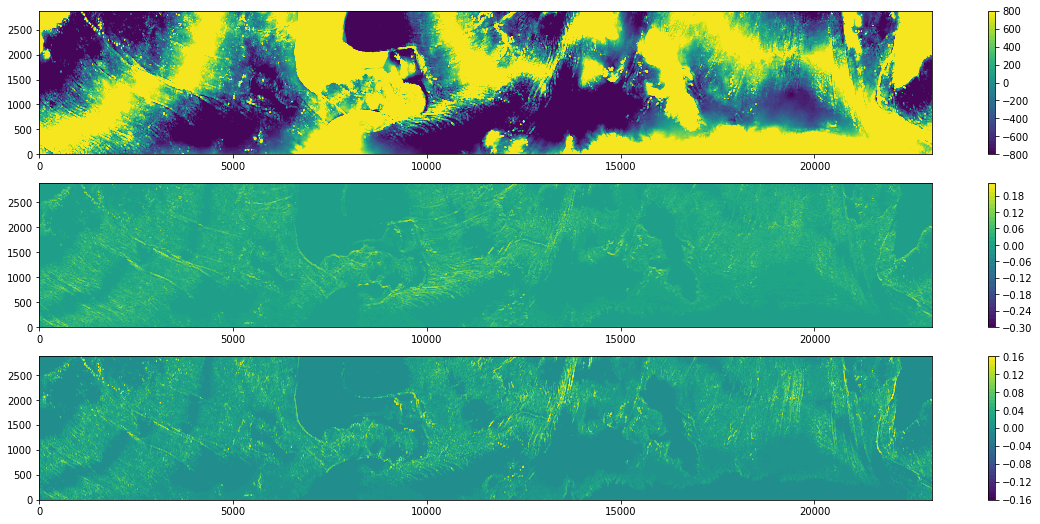

In [106]:
%matplotlib inline
plt.figure(figsize=(20,9))

plt.subplot(3, 1, 1)
plt.contourf(data.xpo, data.ypo, data.dtopoc, 40)
plt.colorbar()

plt.subplot(3, 1, 2)
plt.contourf(data.xpo, data.ypo, Topo_grad[0], 40)
plt.colorbar()

plt.subplot(3, 1, 3)
plt.contourf(data.xpo, data.ypo, Topo_grad[1], 40)
plt.colorbar()

In [100]:
y_start_ind = 20; 
w = np.ones(9);
#w = np.array([1., 0.4, 0.6, 0, 0, 0, 0, 0, 0])
Topo_fft = np.zeros([512,512]);
Topo_eff1 = np.zeros([512,512]);

for i in range(0,len(w)):
    tmp = data.dtopoc.isel(xpo=slice(0 + 512*i, 512*(i+1)), ypo=slice(0 + y_start_ind, 512 + y_start_ind))
    tmp_fft = np.fft.fft2(np.asarray(tmp));
    Topo_fft = Topo_fft + tmp_fft*w[i]; #*np.random.rand(512, 512);
    Topo_eff1 = Topo_eff1 + np.asarray(tmp)*w[i];

Topo_fft = Topo_fft/np.sum(w)
Topo_eff1 = Topo_eff1/np.sum(w)
Topo_eff = np.fft.ifft2(Topo_fft)

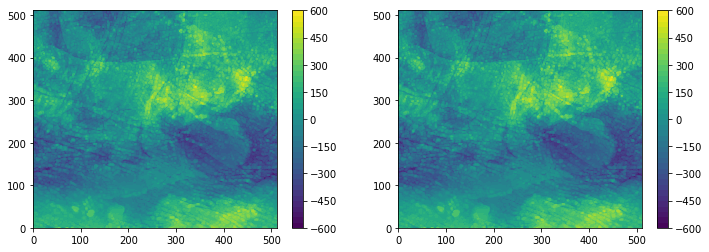

In [101]:
%matplotlib inline
plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
plt.contourf(Topo_eff, 40)
plt.colorbar()

plt.subplot(1, 2, 2)
plt.contourf(Topo_eff1, 40)
plt.colorbar()

In [107]:
Topo_eff_grad =  mpcalc.gradient(Topo_eff, deltas=(5000., 5000.))

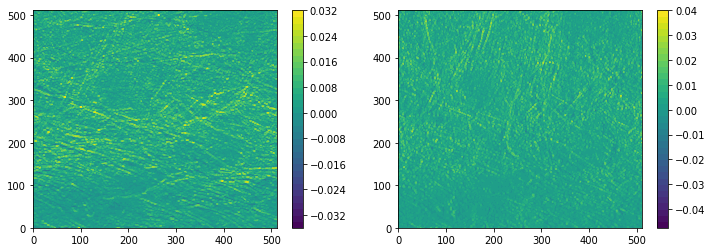

In [108]:
%matplotlib inline
plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
plt.contourf(Topo_eff_grad[0], 40)
plt.colorbar()

plt.subplot(1, 2, 2)
plt.contourf(Topo_eff_grad[1], 40)
plt.colorbar()

Using the mean of 2D spectra does not work. This approach smooths out the topography and this is not a correct representation of the the Southern Ocean bathymetry.

# Random bathymetry generation on isotropic spectrum of topography
Here, we generate topography by summing Fourier series of al possible wavenumbers but we do maintain the isotropic spectrum of topography that we observe in the Southern Ocean. 

$$ Topo_{eff} = \frac{\sum_i w_i e^{i(kx+ly)}}{\sum w_i} $$

where $w_i$ are weights from isotropic spectrum of the Southern Ocean topography.